In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
import io
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
plt.style.use('ggplot')

In [ ]:
f2 = files.upload()
lp_df = pd.read_csv(io.BytesIO(f2['LAPTOP_CLASS_RFe1.csv']))

Saving LAPTOP_CLASS_RFe1.csv to LAPTOP_CLASS_RFe1.csv


In [ ]:
lp_df.head(8)

,SPEED,RAM,STORAGE,GPU,CLASS
0,1.2,8,1000,0,1
1,2.6,16,512,6,2
2,2.2,16,256,6,3
3,2.4,4,256,0,1
4,2.6,16,1256,6,2
5,2.6,32,1000,6,3
6,1.1,4,32,0,1
7,2.4,32,1000,0,3


In [ ]:
lp_df.columns

Index(['SPEED', 'RAM', 'STORAGE', 'GPU', 'CLASS'], dtype='object')

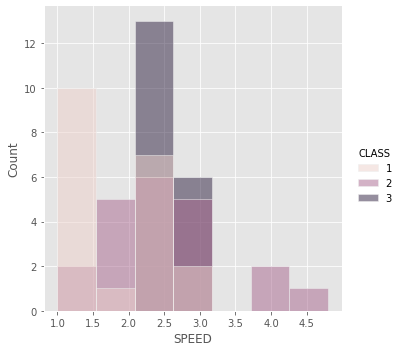

In [ ]:
sns.displot(data = lp_df , x = 'SPEED', hue = 'CLASS')

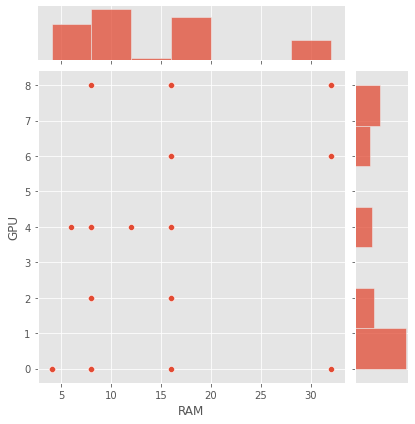

In [ ]:
sns.jointplot(data = lp_df ,x = 'RAM' , y = 'GPU')

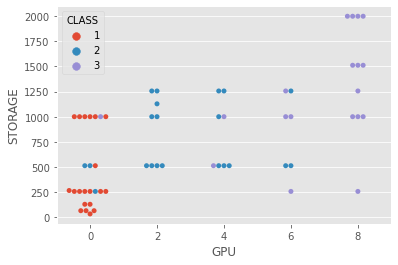

In [ ]:
sns.swarmplot(data = lp_df , x = 'GPU' ,y='STORAGE'  , hue = 'CLASS' )

In [ ]:
A = lp_df[['SPEED', 'RAM', 'STORAGE', 'GPU']]
B = lp_df['CLASS']

In [ ]:
from sklearn.model_selection import train_test_split
A_train , A_test , B_train , B_test = train_test_split(A,B,test_size=0.4 , random_state = 5) #0.4,5  0.33,8    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
lp_RC = RandomForestClassifier()
lp_RC.fit(A_train,B_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RC_pred = lp_RC.predict(A_test)

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
print(confusion_matrix(B_test , RC_pred) , "\n" , classification_report(B_test , RC_pred))

[[8 0 0]
 [2 7 0]
 [0 2 5]] 
               precision    recall  f1-score   support

           1       0.80      1.00      0.89         8
           2       0.78      0.78      0.78         9
           3       1.00      0.71      0.83         7

    accuracy                           0.83        24
   macro avg       0.86      0.83      0.83        24
weighted avg       0.85      0.83      0.83        24



In [ ]:
test_value = np.array([2.3,8,512,4] ).reshape(-1,4)
print("EST. CLASS " , lp_RC.predict(test_value))

EST. CLASS  [2]
